<a href="https://colab.research.google.com/github/cjvilla/Gold-Projections/blob/main/Code/random_forest_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
data = pd.read_csv('/content/drive/MyDrive/Gold-Projections/celine-work/datetime_gold_predictions.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [66]:
data.info

<bound method DataFrame.info of         Date  Inflation_Value  ...  south_african_rand  australian_dollar
0    01/1979              9.3  ...          197.018182         198.600000
1    02/1979              9.9  ...          209.860000         216.650000
2    03/1979             10.1  ...          204.359091         215.945455
3    04/1979             10.5  ...          202.347619         215.414286
4    05/1979             10.9  ...          217.695652         233.165217
..       ...              ...  ...                 ...                ...
487  08/2019              1.7  ...        22746.936360        2212.959091
488  09/2019              1.7  ...        22424.838100        2219.166667
489  10/2019              1.8  ...        22288.847830        2199.952174
490  11/2019              2.1  ...        21740.861900        2153.471429
491  12/2019              2.3  ...        21280.122730        2146.600000

[492 rows x 8 columns]>

Text(0.5, 1.12, 'Feature Correlation')

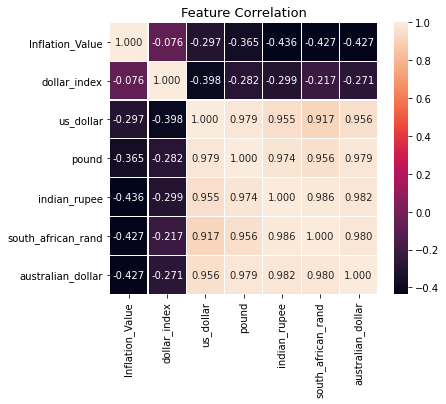

In [67]:
corr = data.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,fmt='.3f',linewidths=0.2)
plt.title('Feature Correlation', y = 1.12, size=13, loc="center")

In [175]:
from sklearn.model_selection import train_test_split
temp = data[['Inflation_Value', 'dollar_index']]
y_temp = data[['us_dollar']]
x = temp.iloc[:,:].values
y= data.loc[:,['us_dollar']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [176]:
y_pred = regressor.predict(x_test)
y_pred

array([1139.34012102,  681.50352995,  441.063053  ,  585.52508019,
        547.13147727, 1146.67809494,  596.03971278,  872.49943184,
        632.41553834, 1046.55136282, 1462.70455862,  975.02520381,
        363.59516774,  463.36614693,  397.51484939, 1313.29157728,
        307.37187621,  424.61172433,  376.48351717,  476.25645964,
        560.96570877,  522.59731772,  411.50606297, 1154.09768321,
       1379.88124938,  403.90641717,  420.52199231, 1151.14039156,
        309.09217002,  677.20319047, 1339.63419891,  398.10320262,
       1190.49299658,  358.82025985,  395.42359317,  948.14506884,
        677.07911746,  601.08411422,  376.48351717,  435.40683613,
        397.06459426,  378.40941558, 1113.18447741, 1037.36357639,
        462.59069761, 1436.11672593, 1082.65744821,  449.22605388,
        909.12632737,  376.59949146,  585.84476082, 1632.32901843,
        822.46732798,  456.95361848,  365.29962819, 1087.00382955,
       1149.58688331,  477.31700491, 1276.31649729,  419.67033

In [177]:
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print("Training Accuracy: ", accuracy_train)
print("Testing Accuracy: ", accuracy_test)

Training Accuracy:  0.9349776197989598
Testing Accuracy:  0.5690435255832689


In [178]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   182.25470202318704
MSE :   87314.97829610611
RMAE :   295.4910798926189


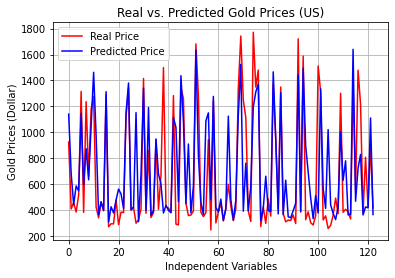

In [179]:
#Visualising the Accuracy of Predicted result
plt.plot(y_test, color = 'Red', label = 'Real Price')
plt.plot(y_pred, color = 'Blue', label = 'Predicted Price')
plt.grid(2.5)
plt.title('Real vs. Predicted Gold Prices (US)')
plt.xlabel('Independent Variables')
plt.ylabel('Gold Prices (Dollar)')
plt.legend()
plt.show()

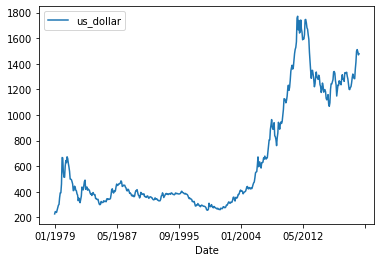

In [209]:
data.plot('Date','us_dollar')

In [212]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                492 non-null    datetime64[ns]
 1   Inflation_Value     492 non-null    float64       
 2   dollar_index        492 non-null    float64       
 3   us_dollar           492 non-null    float64       
 4   pound               492 non-null    float64       
 5   indian_rupee        492 non-null    float64       
 6   south_african_rand  492 non-null    float64       
 7   australian_dollar   492 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 30.9 KB


In [213]:
data['Date']

0     1979-01-01
1     1979-02-01
2     1979-03-01
3     1979-04-01
4     1979-05-01
         ...    
487   2019-08-01
488   2019-09-01
489   2019-10-01
490   2019-11-01
491   2019-12-01
Name: Date, Length: 492, dtype: datetime64[ns]

In [214]:
data = pd.DataFrame(data['us_dollar']).set_index(data['Date'])

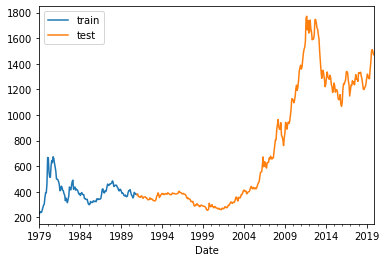

In [216]:
time = pd.Timestamp('1990-12')
train = data.loc[:time,['us_dollar']]
test = data.loc[time:,['us_dollar']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [217]:
for s in range(0, 10):
    train['shift_{}'.format(s)] = train['us_dollar'].shift(s)
    test['shift_{}'.format(s)] = test['us_dollar'].shift(s)

train.head(10)

,us_dollar,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9
Date,,,,,,,,,,,
1979-01-01,227.290909,227.290909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-02-01,245.690000,245.690000,227.290909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-03-01,242.063636,242.063636,245.690000,227.290909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-04-01,238.685714,238.685714,242.063636,245.690000,227.290909,NaN,NaN,NaN,NaN,NaN,NaN
1979-05-01,257.800000,257.800000,238.685714,242.063636,245.690000,227.290909,NaN,NaN,NaN,NaN,NaN
1979-06-01,279.085714,279.085714,257.800000,238.685714,242.063636,245.690000,227.290909,NaN,NaN,NaN,NaN
1979-07-01,294.763636,294.763636,279.085714,257.800000,238.685714,242.063636,245.690000,227.290909,NaN,NaN,NaN
1979-08-01,301.447826,301.447826,294.763636,279.085714,257.800000,238.685714,242.063636,245.690000,227.290909,NaN,NaN
1979-09-01,355.130000,355.130000,301.447826,294.763636,279.085714,257.800000,238.685714,242.063636,245.690000,227.290909,NaN


In [221]:
X_train = train.dropna().drop('us_dollar', axis=1)
y_train = train.dropna()[['us_dollar']]

X_test = test.dropna().drop('us_dollar', axis=1)
y_test = test.dropna()[['us_dollar']]


X_train_t = X_train.values.reshape(X_train.values.shape[0], 10, 1)
X_test_t = X_test.values.reshape(X_test.values.shape[0], 10, 1)
X_train_t.shape

(135, 10, 1)

In [222]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation
import random as python_random
import tensorflow as tf

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(LSTM(100, input_shape=(10,1), activation='gelu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [223]:
history = model.fit(X_train_t, y_train, epochs=1000, batch_size=128)

Epoch 1/1000
2/2 [==============================] - 22s 13ms/step - loss: 114791.0052
Epoch 2/1000
2/2 [==============================] - 0s 12ms/step - loss: 90521.1823
Epoch 3/1000
2/2 [==============================] - 0s 13ms/step - loss: 70193.2188
Epoch 4/1000
2/2 [==============================] - 0s 12ms/step - loss: 46603.4753
Epoch 5/1000
2/2 [==============================] - 0s 13ms/step - loss: 27308.5234
Epoch 6/1000
2/2 [==============================] - 0s 220ms/step - loss: 10460.5426
Epoch 7/1000
2/2 [==============================] - 0s 14ms/step - loss: 2256.7055
Epoch 8/1000
2/2 [==============================] - 0s 12ms/step - loss: 4904.1781
Epoch 9/1000
2/2 [==============================] - 0s 16ms/step - loss: 7386.0319
Epoch 10/1000
2/2 [==============================] - 0s 12ms/step - loss: 7022.4982
Epoch 11/1000
2/2 [==============================] - 0s 12ms/step - loss: 4658.0698
Epoch 12/1000
2/2 [==============================] - 0s 14ms/step - loss: 24

In [224]:
model.evaluate(X_test_t, y_test, batch_size=32)

11/11 [==============================] - 1s 5ms/step - loss: 418.0959


418.095947265625

In [226]:
y_pred = model.predict(X_test_t, batch_size=32)
com = pd.DataFrame({'test' : y_test.us_dollar.values,
             'pred' : y_pred.reshape(-1)})

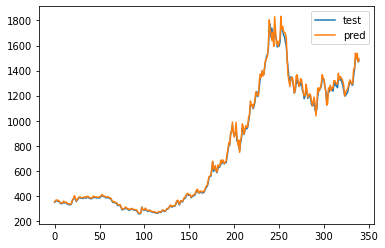

In [227]:
ax = com.plot()
plt.legend(['test', 'pred'])

In [229]:
arr = []
data = X_test_t[-1].reshape(-1)

for i in range(10):
    y_pred = model.predict(data.reshape(1,-1,1), batch_size=32)
    y_pred = y_pred.reshape(-1)[0]
    data = np.roll(data,1)
    arr.append(y_pred)
arr.insert(0, y_test.us_dollar[-1])
arr

[1478.645455,
 1493.9885,
 1293.2579,
 1240.962,
 1310.4916,
 1444.3708,
 1430.9756,
 1551.5703,
 1506.3888,
 1559.4489,
 1481.082]

In [237]:
X = []
X.append(pd.Timestamp('2019-12'))
for i in range(0,10):
    X.append(pd.Timestamp('202'+str(i)+'-12'))
X

[Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-12-01 00:00:00'),
 Timestamp('2025-12-01 00:00:00'),
 Timestamp('2026-12-01 00:00:00'),
 Timestamp('2027-12-01 00:00:00'),
 Timestamp('2028-12-01 00:00:00'),
 Timestamp('2029-12-01 00:00:00')]

[Timestamp('2019-12-01 00:00:00'), Timestamp('2020-12-01 00:00:00'), Timestamp('2021-12-01 00:00:00'), Timestamp('2022-12-01 00:00:00'), Timestamp('2023-12-01 00:00:00'), Timestamp('2024-12-01 00:00:00'), Timestamp('2025-12-01 00:00:00'), Timestamp('2026-12-01 00:00:00'), Timestamp('2027-12-01 00:00:00'), Timestamp('2028-12-01 00:00:00'), Timestamp('2029-12-01 00:00:00')]


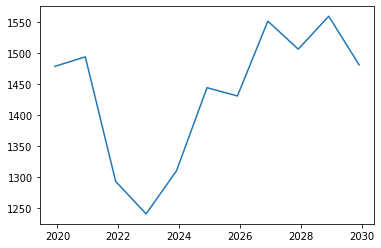

In [246]:
print(X)
plt.plot(X[:],arr[:])